In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as linalg
import math
import time
from matplotlib import colors
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection


In [3]:
# Parameters
E_C = 0.06 # charging energy
epsilon_r = 1000
flux = 0
N = 200
n_array = np.arange(0,N,1)
delta_phase = 4*np.pi/N
t_tilda = 4*E_C/(delta_phase**2)
phase_array = delta_phase*n_array
amount_of_n_g = 200
n_g_array = np.linspace(0,2,amount_of_n_g)
d = 0.35 #squid asymmetry
gamma_L = 0.1 # chain coupling to the left josephson junction
gamma_R = gamma_L # chain coupling to the right josephson junction
gamma = gamma_R+gamma_L
T = 4*gamma_L*gamma_R/(epsilon_r**2+gamma**2)
r = np.sqrt(1-T)
Delta_tilda = 1

In [4]:

def create_grid_H(n_g=0, Delta_tilda=Delta_tilda, phase_array=phase_array,t_tilda=t_tilda,r=r,E_C=E_C,delta_phase=delta_phase):
    diagonal = np.diag(Delta_tilda*np.cos(phase_array/2)+8*E_C/(delta_phase)**2)
    arg = np.full((phase_array.shape[0]-1,),-t_tilda*np.exp(1j*n_g*delta_phase/2))
    off_diagonal = np.diag(arg, k=1)
    B1 = diagonal + off_diagonal + off_diagonal.conj().T
    B1[0,-1], B1[-1,0] = t_tilda*np.exp(1j*2*np.pi*n_g*delta_phase/2), t_tilda*np.exp(-1j*2*np.pi*n_g*delta_phase/2)
    B4 = np.copy(B1)
    np.fill_diagonal(B4, -np.diag(B1))
    B2 = np.diag(r*np.sin(phase_array/2))
    H = np.block([[B1,B2],[B2,B4]])
    print("is H hermitian?", np.sum(np.abs(H-H.conj().T)))
    return H


def eigen_for_each_n_g(n_g_array=n_g_array,phase_array=phase_array):
    eigenvalues_sys = np.zeros((n_g_array.shape[0],2*phase_array.shape[0]), dtype=complex)
    eigenvectors_sys = np.zeros((n_g_array.shape[0],2*phase_array.shape[0],2*phase_array.shape[0]), dtype=complex)
    for i in range(phase_array.shape[0]):
        H = create_grid_H(n_g=n_g_array[i])
        current_eigenvalues, current_eigenvectors = np.linalg.eigh(H)
        eigenvalues_sys[i,:] = current_eigenvalues
        eigenvectors_sys[i,:,:] = current_eigenvectors
    return eigenvalues_sys, eigenvectors_sys

eigenvalues_sys_n_g, eigenvectors_sys_n_g = eigen_for_each_n_g()
amount_of_energies = 10 #eigenvalues_sys_n_g.shape[1] #6*2**N
amount_of_energy_diff = np.sum(list(range(amount_of_energies)))

is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0
is H hermitian? 0.0


In [5]:

def energy_diff(n_g_array=n_g_array, phase_array=phase_array):
    delta_energy_n_g = np.zeros((n_g_array.shape[0],amount_of_energies,amount_of_energies), dtype=complex) # contains the energy differences, 0 axies in the size of n_g array, 1 axies and 2 axies in size of amount of energies. so in each [:,i,j] i will the diff E_i-E_j
    for i in range(amount_of_energies): # a loop that iterates from 0 to 6 including
        print("i =", i)
        for j in range(i+1, amount_of_energies): # a loop that iterates from 0 to 6 including
            diff = eigenvalues_sys_n_g[:,i] - eigenvalues_sys_n_g[:,j] # should be an array with number of rows as "steps" (and flux_array) and one column
            delta_energy_n_g[:,i,j] = diff
    delta_energy_temp_n_g = np.zeros((n_g_array.shape[0],amount_of_energy_diff))
    upper_triangle_indices = np.triu_indices(delta_energy_n_g.shape[1],k=1)
    for i in range(n_g_array.shape[0]):
        delta_energy_temp_n_g[i,:] = np.abs(delta_energy_n_g[i][upper_triangle_indices])
    return delta_energy_temp_n_g

delta_energy_n_g = energy_diff()

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


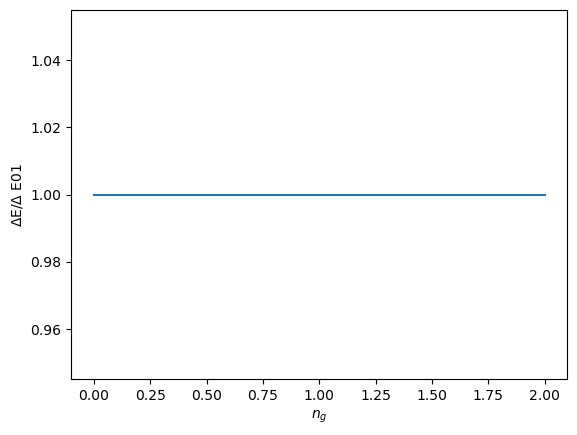

In [6]:

def plot_energy_diff_vs_n_g(amount=amount_of_energies):
    for i in range(amount):
        plt.plot(n_g_array,delta_energy_n_g[:,i]/delta_energy_n_g[:,0])
    plt.xlabel(r'${n_g}$')
    plt.ylabel(r'$\Delta$E/$\Delta$ E01')
    # plt.title('Energy differences from GS (asymmetric transmon, cavity and chain)')
    #plt.ylim(0.99999999,1.00000001)
    # Save the figure as an image (e.g., PNG)
    filename = f'suppresed_n_g_plot_{amount}_epsilon_r_{epsilon_r}.png'
    plt.savefig(filename)
    plt.show()

plot_energy_diff_vs_n_g(amount=1)



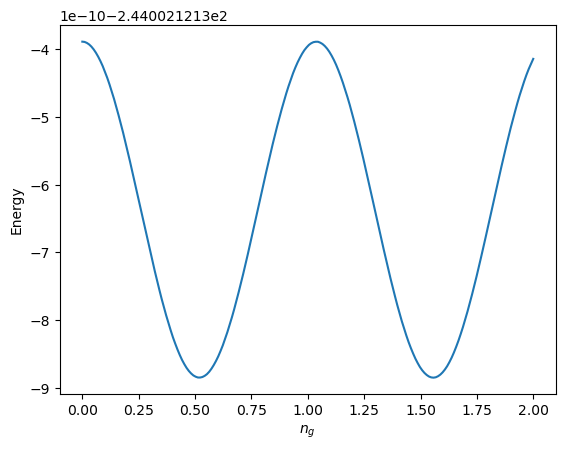

In [8]:
def plot_energy_vs_n_g(amount=amount_of_energies):
    for i in range(amount):
        plt.plot(n_g_array,eigenvalues_sys_n_g[:,i])
    plt.xlabel(r'${n_g}$')
    plt.ylabel('Energy')
    # plt.title('Energy differences from GS (asymmetric transmon, cavity and chain)')

    # Save the figure as an image (e.g., PNG)
    filename = f'suppresed_n_g_plot_{amount}.png'
    plt.savefig(filename)
    plt.show()

plot_energy_vs_n_g(1)